## 1. 선형회귀 표현하기 

### 공부시간에 따른 성적에 대한 예측선(선형회귀선) 그려보기
* 공부시간은 X, 성적은 y로 주어진 X에 대한 값(변수)가 '공부시간' 하나 이기 때문에 최소제곱법으로 절편과 기울기를 구하자
* 최소 제곱법으로 기울기 a 구하는 공식 -> a = (x-x평균)*(y-y평균)의 합 / (x-x평균)^2의 합
* y절편인 b를 구하는 공식 -> b = y의 평균 -(x의 평균 * 기울기 a)

* 선형회귀 코드로 표현하기

In [22]:
import numpy as np
x= [2,4,6,8]
y = [81,93,91,97]
mx = np.mean(x)
my = np.mean(y)


def gradient_LSM(x, mx, y, my):#LSM은 최소제곱법, gradient는 기울기를 의미
    div = sum([(i-mx)**2 for i in x]) #기울기를 구하기위한 공식 적용위해 분모 먼저 변수화
    d = 0 #기울기 공식의 분자
    for i in range(len(x)):
        d += (x[i]-mx) * (y[i]-my)
    return d/div

#기울기 a
a = gradient_LSM(x,mx,y,my)

#y절편인 b구하기
b = my -(mx*a)

#선형회귀선 함수
print('선형회귀선 함수 y = ',a,'x + ',b)
print('기울기 a : ',a)
print('y 절편 b :', b)

#위 선형회귀선 함수에 x(공부시간)를 적용하여 구해진 성적 리스트 구하기 
y_new = []
for i in x:
    y_new.append(a*i+b)

print('원래의 성적 : ',y,'\n선형회귀함수를 통해 구해진 성적 : ', y_new)

선형회귀선 함수 y =  2.3 x +  79.0
기울기 a :  2.3
y 절편 b : 79.0
원래의 성적 :  [81, 93, 91, 97] 
선형회귀함수를 통해 구해진 성적 :  [83.6, 88.2, 92.8, 97.4]


* 완성된 선형회귀선과, 실제 데이터 그래프로 표현해보기 

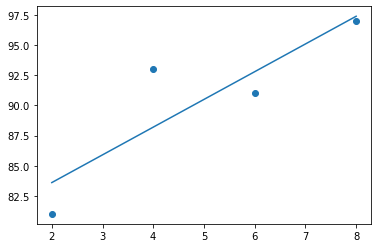

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x,y, label = 'origin')
plt.plot(x,y_new, label = 'new')
plt.show()

## 2. 평균제곱오차 (Mean Squre Error, MSE)
* 앞선 최소제곱법은 입력이 단하나(공부시간) 이었으며, 앞으로의 여러개의 입력을 처리하기에는 무리가 있다. 
* 딥러닝은 대부분 입력값이 여러개인 상황에서 이를 해결하기 위해 실행하기 때문에,
* 여러개의 입력값을 계산할때는 임의의선을 그리고 난 후, 이선이 얼마나 잘그려진지 평가하여 조금씩 수정하는 방법을 사용한다.
* 주어진 선의 오차를 평가하는 '오차 평가 알고리즘'이 필요하다!

#### 평균제곱오차(MSE)- 값을 예측하는 선에 각 입력을 대입하고 얻어진 예측값과 실제값의 차이를 구해, 평균제곱오차를 구한다.

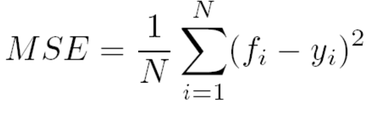


* i 는 x(입력값)이 나오는 순서, N은 x원소의 총 개수를 의미한다,
* f는 예측값 x입력시 나오는 예측값, y는 실제값을 의미함.

###  일단 그리고 조금씩 수정해 나가기
* 가설을 하나 세운뒤, 이 값이 주어진 요건을 충족하는지 판단하여 조금씩 변화를 주고,
* 이변화가 긍정적이면 오차가 최소가 될대가지 이과정을 계속 반복하는 방법. -> 딥러닝을 가능하게 해주는 가장 중요한 원리 중 하나
* 따라서 이과정에선, 나중에 그린 선이 먼저 그린선보다 더 좋은지 나쁜지 판단할 방법이 필요하다. 


* 코딩으로 평균제곱오차 확인해보기

In [24]:
fage_a_b = [3, 76]#아까의 공부시간-성적에 대한 함수에서, 기울기를 3, y절편을 76이라 가정하는 리스트를 생성한다.
x,y#공부시간과 실제 값

def predict(x):
    return fage_a_b[0]*x+fage_a_b[1]
#절편과 기울기를 예측한 리스트로 함수를 만들어 x를 대입 

def mse(y_hat, y):
    return ((y_hat-y)**2).mean()
# 평균 제곱근 공식 - y_hat(예측값)

def mse_val(predict_result, y):
    return mse(np.array(predict_result), np.array(y))
# mse()함수에 데이터를 대입하여 최종값을 구하는 함수 

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print('공부시간 = %.f, 실제접수 = %.f, 예측점수 = %.f'%(x[i], y[i], predict_result[i]))
    
print('mse 최종값 : '+str(mse_val(predict_result, y)))
print('앞서 그은 선형회귀에서의 mse 최종값 : '+ str(mse_val(y_new, y)))

공부시간 = 2, 실제접수 = 81, 예측점수 = 82
공부시간 = 4, 실제접수 = 93, 예측점수 = 88
공부시간 = 6, 실제접수 = 91, 예측점수 = 94
공부시간 = 8, 실제접수 = 97, 예측점수 = 100
mse 최종값 : 11.0
앞서 그은 선형회귀에서의 mse 최종값 : 8.299999999999985


* 이를 통해 우리가 처음 가정한 a=3, b= 76은 오차가 약 11.0 이다. 그리고 좀앞서 선형회귀선을 그으면서 가정된 속성에 대해선 오차가 약 8.3이다. 
* 이제 남은 것은 이 오차를 줄이면서 새로운 선을 긋는것이다. 오차가 최소화 되는 a,b의 값을 구해야 된다. 

## 3. 경사 하강법 

* 기울기 a를 너무 크게 잡거나 너무 작게 잡으면 오차가 커진다.
* a를 무한대로 키우면 오차도 무한대로 커지고, 반대로도 오차가 무한대로 커진다. 
* 기울기와 오차의 관계를 이차함수로 그렸을때, 최저점이 오차가 가장 작다. 
* 따라서 최저점 m의 위치를구하려면, 임의의 한점을 찍고 이점을 m에 가까운 쪽으로 점점 이동시킬 과정이 필요하다. 
* 오차를 비교하여 가장 작은 방향으로 이동시키는방법이 바로 미분 기울기를 이용하는 경사하강법 

### 경사하강법에서 미분값이 0인 지점 을 찾는 과정 
* a1에서 미분을 구한다.
* 구해진 기울기의 반대방향 으로 얼마간 이동시킨 a2에서 미분을 구한다.
* 위에서 구한 미분값이 0이 아니라면 반복한다. 

### 학습률 
* 기울기의 부호를 바꿔 이동시킬때, 적절한 거리를 못찾으면 최저점에서 멀리떨어져, 한점으로 모이지 않고 위로 취솟을 수 있다. 
* 이동거리를 정해주는것이 바로 학습률이다.
* 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는것이 중요한 최적화 과정

### 코딩으로 확인하는 경사하강법 
* 최솟값을 구하기 위해 이차 함수에서 미분해야하고, 이차함수는 평균제곱 오차를 통해 나온다. 

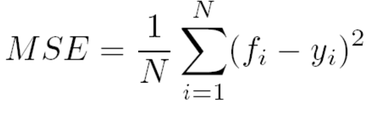
평균 제곱 오차 식에서, 예측값 부분에 axi +b 를 대입해준다

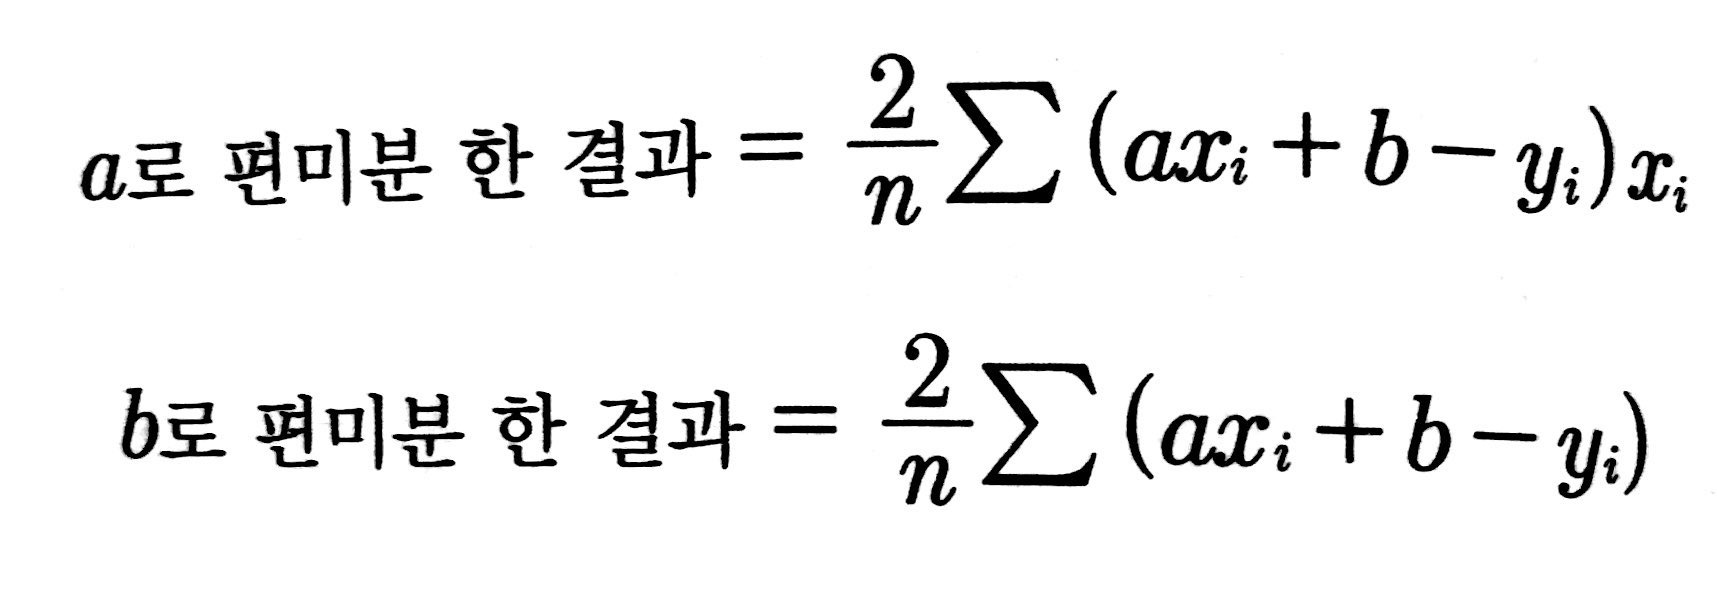

* 이를 각각 파이썬 코드로 바꿔주면 다음과 같다
y_pred = a* x +b
error = y - y_pred

a_diff = -(2/len(x))* sum(x*(error))
b_diff = -(2/len(x))* sum(y-y_pred))


epoch = 0, 기울기 = 23.2000, 절편 = 4.5250
epoch = 100, 기울기 = 7.9316, 절편 = 45.3932
epoch = 200, 기울기 = 4.7953, 절편 = 64.1094
epoch = 300, 기울기 = 3.4056, 절편 = 72.4022
epoch = 400, 기울기 = 2.7899, 절편 = 76.0766
epoch = 500, 기울기 = 2.5171, 절편 = 77.7047
epoch = 600, 기울기 = 2.3962, 절편 = 78.4261
epoch = 700, 기울기 = 2.3426, 절편 = 78.7457
epoch = 800, 기울기 = 2.3189, 절편 = 78.8873
epoch = 900, 기울기 = 2.3084, 절편 = 78.9501
epoch = 1000, 기울기 = 2.3037, 절편 = 78.9779
epoch = 1100, 기울기 = 2.3016, 절편 = 78.9902
epoch = 1200, 기울기 = 2.3007, 절편 = 78.9957
epoch = 1300, 기울기 = 2.3003, 절편 = 78.9981
epoch = 1400, 기울기 = 2.3001, 절편 = 78.9991
epoch = 1500, 기울기 = 2.3001, 절편 = 78.9996
epoch = 1600, 기울기 = 2.3000, 절편 = 78.9998
epoch = 1700, 기울기 = 2.3000, 절편 = 78.9999
epoch = 1800, 기울기 = 2.3000, 절편 = 79.0000
epoch = 1900, 기울기 = 2.3000, 절편 = 79.0000
epoch = 2000, 기울기 = 2.3000, 절편 = 79.0000


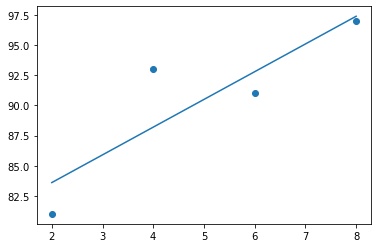

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

x_data = np.array(x)
y_data = np.array(y)
#기울기 a와 b 초기화 
a,b = 0,0

#학습률 정하기 
lr = 0.05

#반복횟수 정하기 
epochs = 2001

#경사 하강법 시작 
for i in range(epochs):
    y_pred = a*x_data+b
    error = y_data - y_pred
    
    #오차함수를 a로 미분한 값
    a_diff = -(1/len(x_data)) * sum(x_data * (error))
    #오차함수를 b로 미분한 값 
    b_diff = -(1/len(x_data)) * sum(y_data - y_pred)
    
    #학습률을 곱해 기울기 a와 절편 b 값 업데이트
    a = a - lr*a_diff
    b = b- lr*b_diff
    
    if i %100 == 0:
        print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f'%(i,a,b))
        
y_pred = a * x_data +b
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

* 강하학습법을 적용해서 구해진 a, b가 특정값에 수렴하는 과정을 볼수 있었다. 
* 이렇게 최소 제곱법을 쓰지않고 평균제곱오차와 경사 하강법을 통해 원하는 값을 구할 수 있다. 

## 4. 다중 선형회귀 
* 앞선 요소에선, 입력값이 단 하나(공부시간) 이었으며 따라서 시간에 따라 정확히(또는 유사하게) 원래값을 예측하는 선을 그리지 못했다. 
* 더 정확한 예측을 하기 위해선 추가정보를 입력해야되며, 변수의 갯수를 늘려 다중선형 회귀를 만들어주어야 한다. 
* 앞선 데이터에, 과외 수업 횟수라는 feature을 추가한다면 독립변수가 2개가 생긴다. - y = a1x2 +a2x2 +b
* 각각의 변수에 맞물리는 기울기를 구해보자 

#### 코딩으로 확인하는 다중 선형회귀

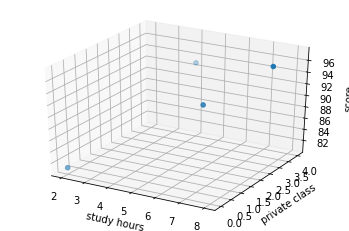

In [26]:
x1 = x # 공부시간
x2 = [0,4,2,3] # 과외시간
y = y # 성적 

#3차원 그래프로 확인해보기 
from mpl_toolkits import mplot3d
ax = plt.axes(projection = '3d')
ax.set_xlabel('study hours')
ax.set_ylabel('private class')
ax.set_zlabel('score')
ax.scatter(x1,x2,y)
plt.show()

* x가 두개가 되었으므로, 각각의 값에 기울기a값이 다르므로 기울기도 a1,a2 두가지로 만든다. 
* 앞서 했던 방식과 같이, 경사 하강법을 적용하고 학습률을 곱해 기존의 값을 업데이트 한다. 

In [27]:
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data = np.array(y)
#기울기 a와 b 초기화 
a1,a2, b = 0,0,0

#학습률 정하기 
lr = 0.05

#반복횟수 정하기 
epochs = 2001

#경사 하강법 시작 
for i in range(epochs):
    y_pred = a1*x1_data+ a2*x2_data +b
    error = y_data - y_pred
    
    #오차함수를 a1(공부시간 변수에 따른 기울기)로 미분한 값
    a1_diff = -(1/len(x1_data)) * sum(x1_data * (error))
    #오차함수를 a2(과외시간 변수에 따른 기울기)로 미분한 값
    a2_diff = -(1/len(x2_data)) * sum(x2_data * (error))
    #오차함수를 b로 미분한 값 
    b_diff = -(1/len(x1_data)) * sum(y_data - y_pred)
    
    #학습률을 곱해 기울기 a와 절편 b 값 업데이트
    a1 = a1 - lr*a1_diff
    a2 = a2 - lr*a2_diff
    b = b- lr*b_diff
    
    if i %100 == 0:
        print('epoch = %.f, 기울기 a1 = %.04f, 기울기 a2 = %.04f, 절편 = %.04f'%(i,a1,a2,b))
        
y_pred = a1 * x1_data + a2 * x2_data +b


epoch = 0, 기울기 a1 = 23.2000, 기울기 a2 = 10.5625, 절편 = 4.5250
epoch = 100, 기울기 a1 = 6.4348, 기울기 a2 = 3.9893, 절편 = 43.9757
epoch = 200, 기울기 a1 = 3.7255, 기울기 a2 = 3.0541, 절편 = 62.5766
epoch = 300, 기울기 a1 = 2.5037, 기울기 a2 = 2.6323, 절편 = 70.9656
epoch = 400, 기울기 a1 = 1.9527, 기울기 a2 = 2.4420, 절편 = 74.7491
epoch = 500, 기울기 a1 = 1.7042, 기울기 a2 = 2.3562, 절편 = 76.4554
epoch = 600, 기울기 a1 = 1.5921, 기울기 a2 = 2.3175, 절편 = 77.2250
epoch = 700, 기울기 a1 = 1.5415, 기울기 a2 = 2.3001, 절편 = 77.5720
epoch = 800, 기울기 a1 = 1.5187, 기울기 a2 = 2.2922, 절편 = 77.7286
epoch = 900, 기울기 a1 = 1.5084, 기울기 a2 = 2.2886, 절편 = 77.7992
epoch = 1000, 기울기 a1 = 1.5038, 기울기 a2 = 2.2870, 절편 = 77.8310
epoch = 1100, 기울기 a1 = 1.5017, 기울기 a2 = 2.2863, 절편 = 77.8453
epoch = 1200, 기울기 a1 = 1.5008, 기울기 a2 = 2.2860, 절편 = 77.8518
epoch = 1300, 기울기 a1 = 1.5003, 기울기 a2 = 2.2858, 절편 = 77.8547
epoch = 1400, 기울기 a1 = 1.5002, 기울기 a2 = 2.2858, 절편 = 77.8561
epoch = 1500, 기울기 a1 = 1.5001, 기울기 a2 = 2.2857, 절편 = 77.8567
epoch = 1600, 기울기 a1 = 1.5000, 기울기 

## 5. 참, 거짓 판단 장치: 로지스틱 회귀

* 딥러닝을 수행한다는 것은 겉으로 드러나지 않는 '판단장치'를 이용해 복잡한 연산을 해낸 끝에'최적'의 예측값을 내놓는 작업 
* 참과 거짓 중 하나를 내놓는 과정은 로지스틱 회귀의 원리를 따른다. 
* 로지스틱 회귀는 선형 회귀와 마찬가지로 적절한 선을 그려나가는 과정, 다만 직선이 아니라 참과 거짓을 구분하는 s자 형태의 선을 그어준다. 

### 시그모이드 함수 

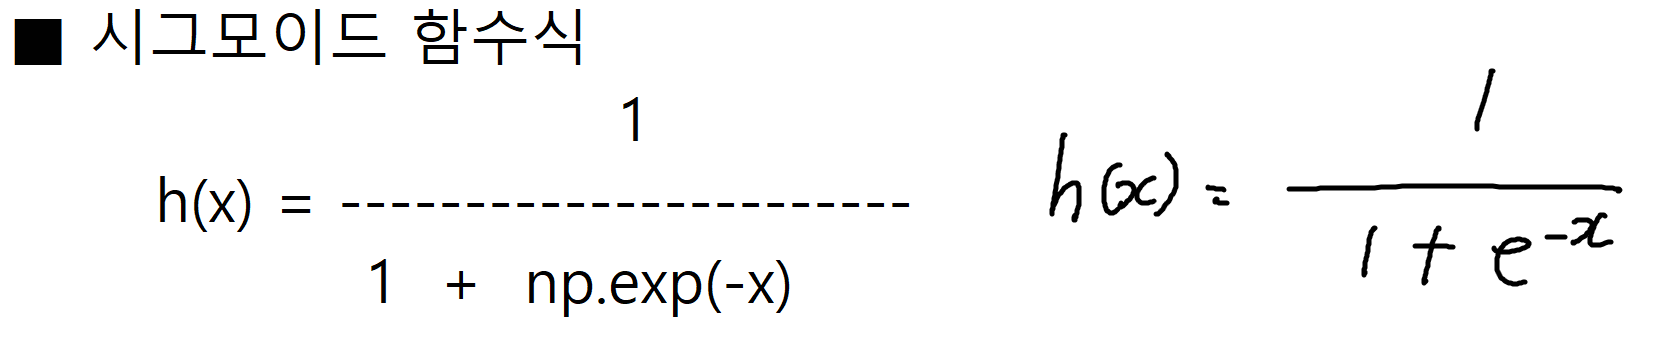

* 2장에서 시그모이드 함수의 그래프를 확인해봤기 때문에, 로지스틱회귀를 풀어나가는 시그모이드 함수식은 다음과 같다. 
* 여기서 x에 다양한 입력(ax+b)가 들어올수 있고, 이에 따라 시그모이드 함수의 형태가 달라진다. 
* a값이 클수록 시그모이드 함수의 경사가 커지고(세워), 낮을수록 경사도 작아진다. b의 값에 따라 그래프가 좌우로 이동한다. 
* 이에 따라, a값이 0에 가까워지면 x축에 점점 평행해지지만 오차는 줄어들고, 무한대로 커지면 시그모이드 함수의 경사가 커지나 오차가 커질 수 있다. 
* b값에 따르면 너무 크거나 작은 경우 오차 가 이차함수의 그래프와 유사한 형태로 나타나기 때문에 적절한 a,b값을 찾는게 마찬가지로 중요하다.

### 오차공식 
* 시그모이드 함수에서의 a,b값은 경사 하강법으로 구할 수 있다. 하지만 시그모이드는 y값이 0~1사이라는 특징을 가지고 있어, 실제 값이 1일때 예측값이 0이 가까우면 오차가 큰것이다. 이러한 것을 공식으로 해주는 함수가 로그 함수 

### 로그함수 
* 실제 값이 y_data라 할때, 실제 이 1일때는 -y_data * logh, 0일때는 (1-y_data) * log(1-h)로 사용할 수 있다 여기서 h는 예측값 

### 코딩으로 확인해보는 로지스틱 회귀 

In [28]:
data = [[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data = [i[0] for i in data] # 공부시간 데이터 
y_data = [i[1] for i in data] # 합격여부 

(-0.1, 1.1)

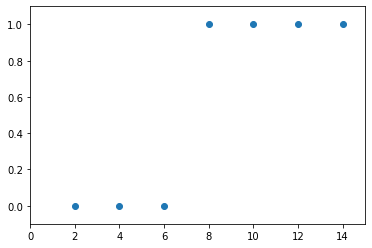

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x_data,y_data)
plt.xlim(0,15)
plt.ylim(-.1, 1.1)

epoch = 0, 기울기 = -0.0500, 절편 = -0.0250
epoch = 0, 기울기 = -0.1388, 절편 = -0.0472
epoch = 0, 기울기 = -0.2268, 절편 = -0.0619
epoch = 0, 기울기 = 0.1201, 절편 = -0.0185
epoch = 0, 기울기 = 0.2374, 절편 = -0.0068
epoch = 0, 기울기 = 0.2705, 절편 = -0.0040
epoch = 0, 기울기 = 0.2860, 절편 = -0.0029
epoch = 1000, 기울기 = 1.4978, 절편 = -9.9401
epoch = 1000, 기울기 = 1.4940, 절편 = -9.9411
epoch = 1000, 기울기 = 1.4120, 절편 = -9.9547
epoch = 1000, 기울기 = 1.4949, 절편 = -9.9444
epoch = 1000, 기울기 = 1.4982, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4984, 절편 = -9.9440
epoch = 1000, 기울기 = 1.4985, 절편 = -9.9440
epoch = 2000, 기울기 = 1.9065, 절편 = -12.9489
epoch = 2000, 기울기 = 1.9055, 절편 = -12.9491
epoch = 2000, 기울기 = 1.8515, 절편 = -12.9581
epoch = 2000, 기울기 = 1.9057, 절편 = -12.9514
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513
epoch = 2000, 기울기 = 1.9068, 절편 = -12.9513


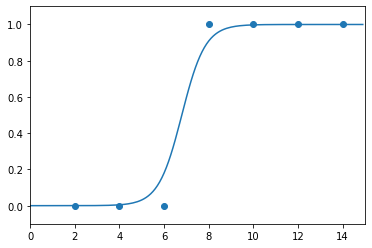

In [30]:
a, b = 0,0 # 기울기와 절편 초기화 
lr = 0.05 # 학습률 

#시그모이드 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))

for i in range(2001):
    for x_data, y_data in data:
        
        #a(기울기)에 대한 편미분, 앞서 정의한 시그모이드 함수 사용 
        a_diff = x_data*(sigmoid(a*x_data+b) - y_data)
        
        #b에 관한 편미분 
        b_diff = sigmoid(a*x_data +b)- y_data
        
        #a를 업데이트 하기위해 a_diff 에 학습률 lr을 곱한 값을 a에서 빼줌 
        a = a-lr*a_diff
        b = b - lr* b_diff
        if i%1000 ==0:
            print('epoch = %.f, 기울기 = %.04f, 절편 = %.04f'%(i,a,b))
    

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]    
plt.scatter(x_data,y_data)    
plt.xlim(0,15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0,15,0.1))
plt.plot(np.arange(0,15,0.1), np.array([sigmoid(a*x +b)  for x in x_range]))
plt.show()    




* 마찬가지로 시그모이드 형태의 함수가 잘 만들어 지도록, 에포크의 횟수가 늘때마다 기울기와 절편의 값이 특정값으로 수렴한다
* 하지만 여기서 입력값이 두개가 아니라 세개 이상의 값을 다루게 되면 소프트맥스(sotfmax)라는 함수를 써주어야 한다. 

### 로지스틱 회귀에서 퍼셉트론으로 
* 지금까지 정리된 내용으로,입력값을 통해 출력값(미래의 예측값까지)을 구하는 함수 y는 y = a1x1 + a2x2+ b로 표현된다.
* a1,a2는 각각 독립된변수에서 적용되는 기울기, 즉 가중치이며, b는 y절편이다. 
* 다음 그림은 로지스틱 회귀를 퍼셉트론 방식으로 표현한 예이다. 이러한 퍼셉트론(레이어)들이 여러겹이 쌓여 신경망을 구축하게 된다. 

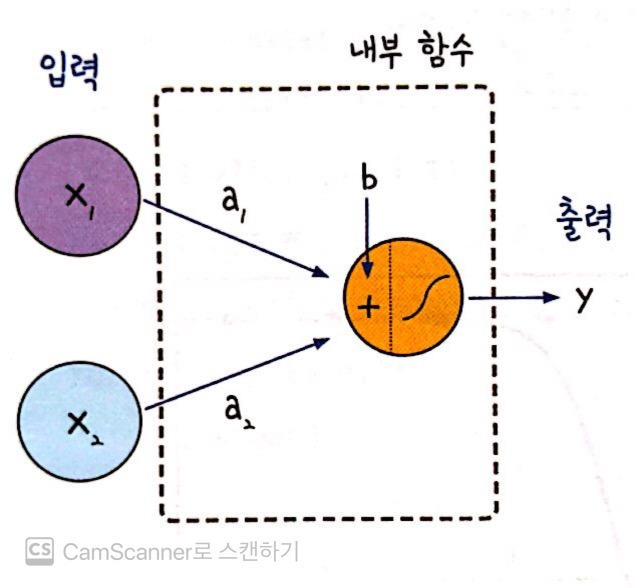